In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

import glob

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = "data"

data


In [15]:
data_dir = pathlib.Path(data_dir)

In [16]:
data_dir.glob('*/*.jpg')

<generator object Path.glob at 0x000001DC4C979D48>

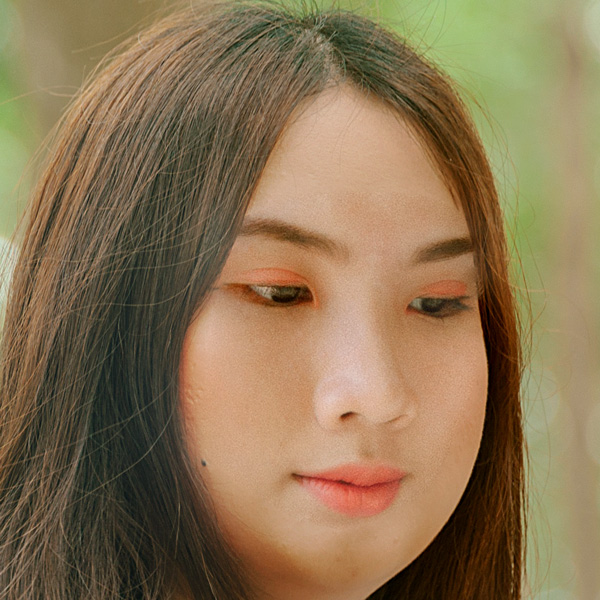

In [24]:
data_dir = "data"
data_dir = pathlib.Path(data_dir)
photo = list(data_dir.glob('*/*.jpg'))

from PIL import Image
im = Image.open(photo[0])
im

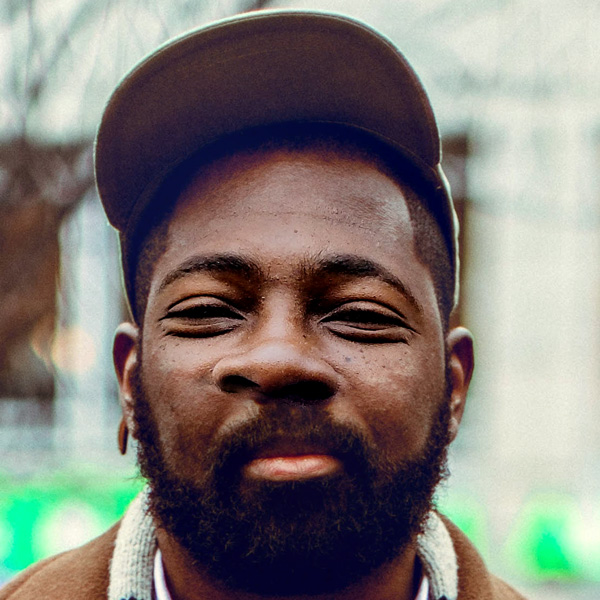

In [20]:
from PIL import Image
im = Image.open('data/training_fake/easy_1_1110.jpg')
im

In [27]:
(img_height, img_width) = (600, 600)
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2041 files belonging to 2 classes.
Using 1633 files for training.


In [28]:
class_names = train_ds.class_names
print(class_names)

['training_fake', 'training_real']


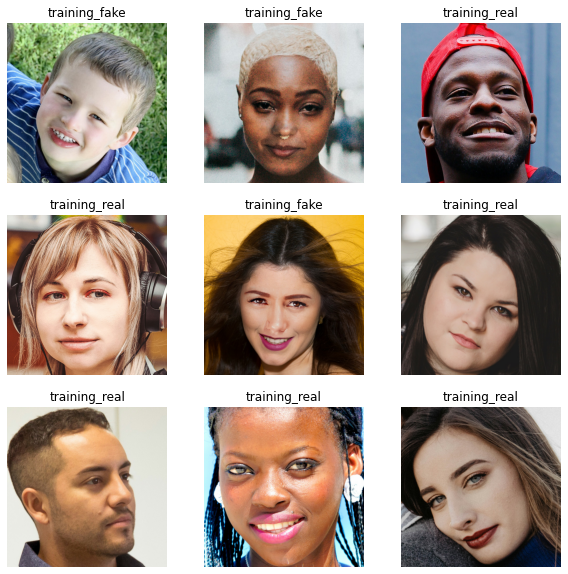

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [30]:
filenames = glob.glob("data/training_fake/*.jpg")
labels = [str(1) + filename[-8:-4:1] for filename in filenames]
dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

In [32]:
def _parse_function(filename, label):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.cast(image_decoded, tf.float32)/255
    return image, label

In [33]:
dataset = dataset.map(_parse_function)

In [35]:
dataset.class_names

AttributeError: 'MapDataset' object has no attribute 'class_names'

In [93]:
# Create CNN model without Dropout
CNN_plain = tf.keras.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    
    # Convolutional Layer 2
    tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    
    # Convolutional Layer 3
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    
    # Fully Connected Output Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

CNN_plain.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

In [94]:
history = {}
history["CNN_Plain"] = CNN_plain.fit(dataset,
                                     epochs=100,
                                     verbose=1)

Epoch 1/100


ValueError: in user code:

    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, None, 3]


In [95]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [97]:
x_train.shape

(50000, 32, 32, 3)